# Use Case

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:
•	About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
•	Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
•	Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
•	Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
•	Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.


# Problem Description

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:
•	0 represents no heart disease present
•	1 represents heart disease present

# Dataset

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

•	slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

•	thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

•	resting_blood_pressure (type: int): resting blood pressure

•	chest_pain_type (type: int): chest pain type (4 values)

•	num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

•	fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

•	resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

•	serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

•	oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

•	sex (type: binary): 0: female, 1: male

•	age (type: int): age in years

•	max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

•	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

# Importing Libraries

###### The required  libraries are:
###### 1. Numpy:- Numpy is Python library used for working with arrays.
###### 2. Pandas:- Pandas is mainly used for data analysis and manipulation of tabular data in DataFrames.
###### 3. Matplotlib:- Matplotlib is a comprehensive library for creating static, animated, and interactive visualiztions in Python.
###### 4. Seaborn:- Seaborn is the library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
###### 5. Scikit-learn(sklearn):- It is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Importing the data

Importing the csv file dataset for usage it converting into DataFrames using Pandas library

In [2]:
data1 = pd.read_csv('values.csv')
data2 = pd.read_csv('labels.csv')

In [3]:
data1.head() #It shows first five columns of datadet

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
data2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


#### Merging the data

In [5]:
df = pd.merge(data1,data2) #combining the two datasets into one

In [6]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [7]:
df.columns #To get all column identities in dataset

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [8]:
df.shape #it shows size of the dataset

(180, 15)

In [9]:
#checking for numerical data
df._get_numeric_data().head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0


In [10]:
#checking for categorial data
df.select_dtypes(include=['object']).head()

,patient_id,thal
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect


In [11]:
df.info() #getting information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [12]:
df.describe() #describing the data

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [13]:
#checking for unique values
df.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [14]:
#checking for missing values
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [15]:
#checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

# Exploratory Data Analysis

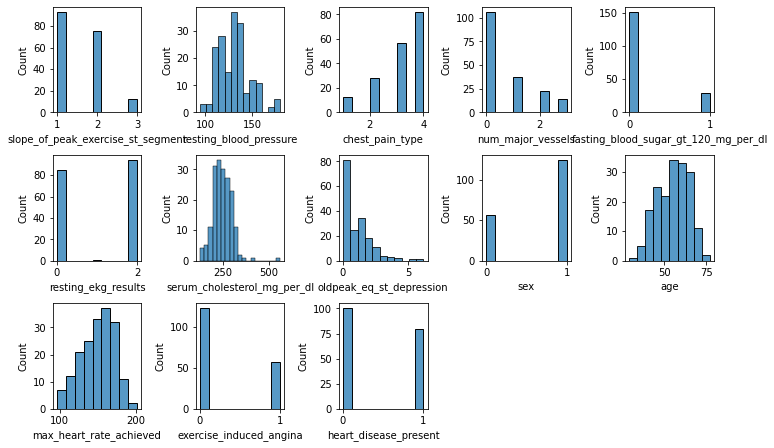

In [16]:
cols = 5
rows = 5
num_cols = df.select_dtypes(exclude = 'object').columns
fig = plt.figure(figsize = (cols*2, rows*2))
for i,col in enumerate(num_cols):
    ax = fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col],ax=ax)
fig.tight_layout()
plt.show()

slope_of_peak_exercise_st_segment. Quality of blood to the heart 1 (52%) and 2 (42%). 
thallium stress test measuring blood flow to the heart : Normal 54%, reversible_defect 41%. 
resting blood pressure. 130 (14%), 140 (12%), 120 (11,7%), and others <10%. 
chest pain type : category 4 (46%), 3 (32%), 2 (16%), and 1 (7%). 

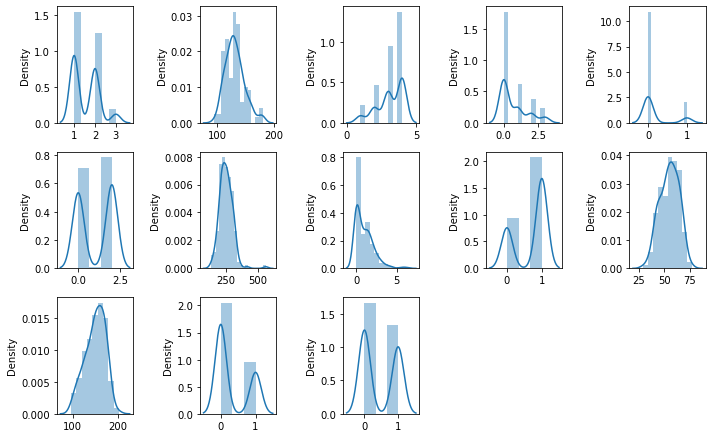

In [17]:
cols = 5
rows = 5
num_cols = df.select_dtypes(exclude = 'object').columns
fig = plt.figure(figsize = (cols*2, rows*2))
for i,col in enumerate(num_cols):
    ax = fig.add_subplot(rows,cols,i+1)
    sns.distplot(x=df[col],ax=ax)
fig.tight_layout()
plt.show()

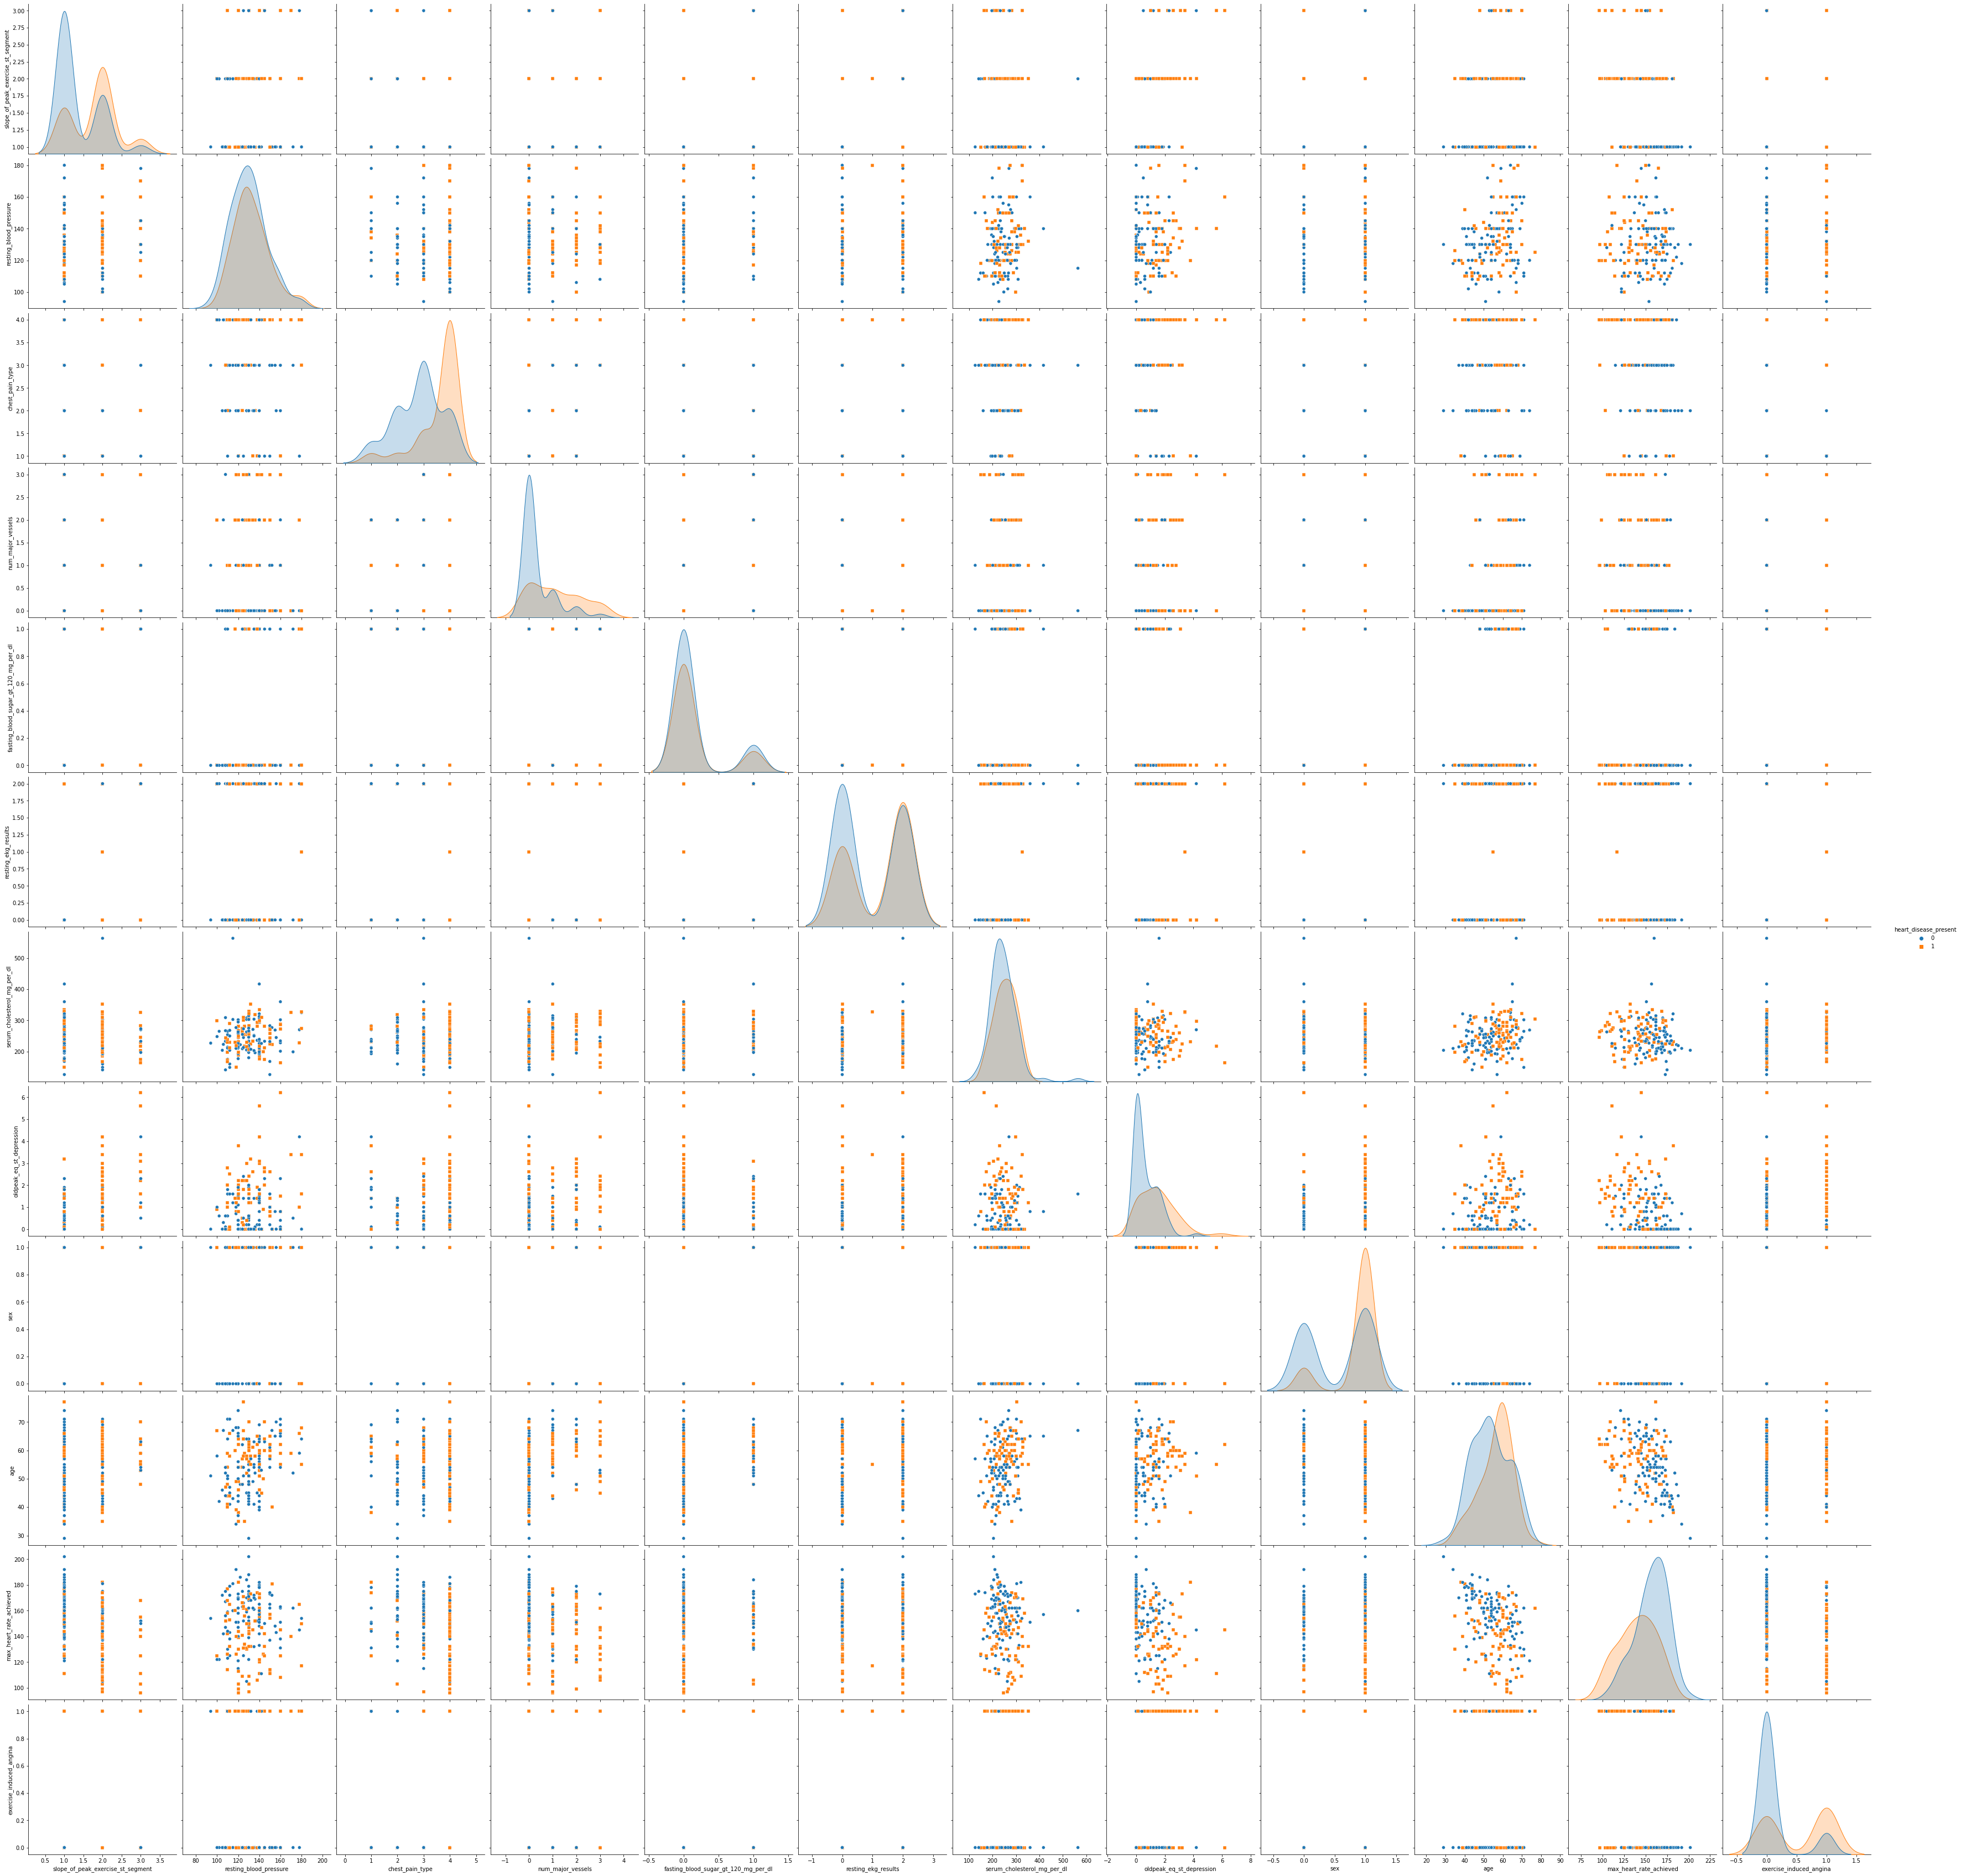

In [18]:
sns.pairplot(data=df,aspect=1,hue='heart_disease_present',markers = ['o','s'],height=4)
plt.show()

In [19]:
#identify categorical
df.select_dtypes(include='object').columns

Index(['patient_id', 'thal'], dtype='object')

In [20]:
#converting categorical data to numerical data
le = LabelEncoder()
le.fit(df.thal)
df['thal'] = le.transform(df.thal)

In [21]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [22]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,1,160,3,1,0,0,201,0.0,0,54,163,0,0


In [23]:
df1 = df.drop('patient_id',axis=1, inplace=True)
df1 = df

In [24]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [25]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


<AxesSubplot:xlabel='thal', ylabel='count'>

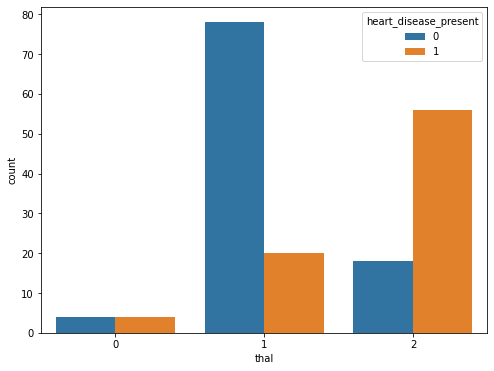

In [26]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='thal', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='slope_of_peak_exercise_st_segment', ylabel='count'>

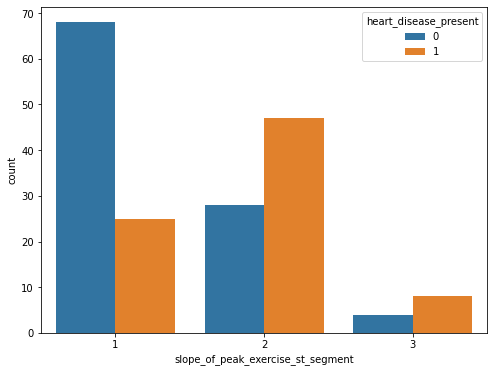

In [27]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='slope_of_peak_exercise_st_segment', hue='heart_disease_present', data=df)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='count'>

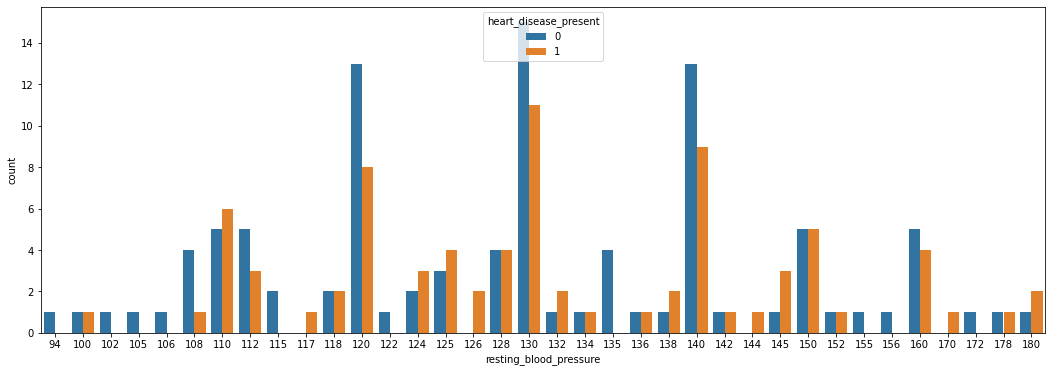

In [28]:
fig, ax = plt.subplots( figsize = (18,6) )
sns.countplot( x='resting_blood_pressure', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

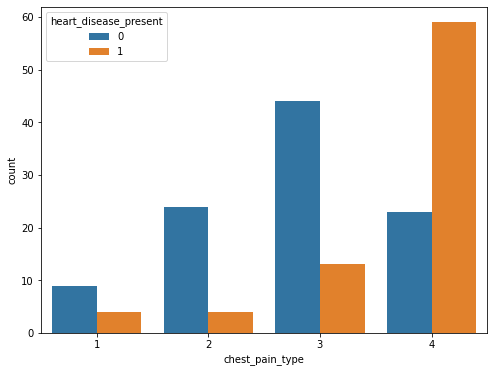

In [29]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='chest_pain_type', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

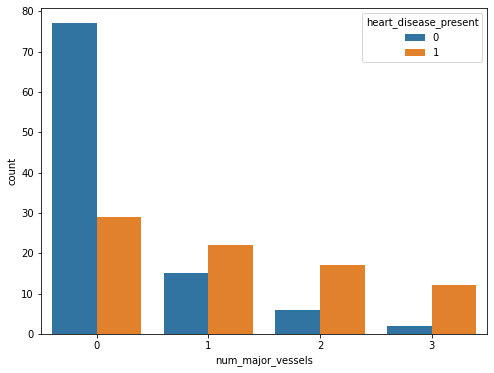

In [30]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='num_major_vessels', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='count'>

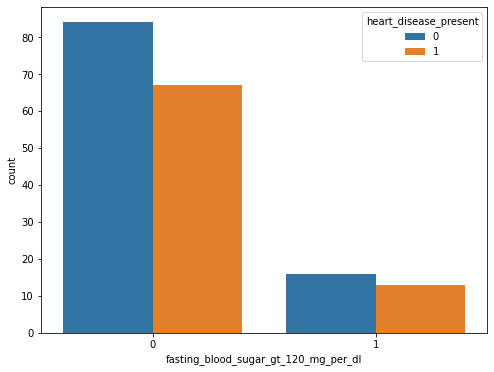

In [31]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='fasting_blood_sugar_gt_120_mg_per_dl', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='resting_ekg_results', ylabel='count'>

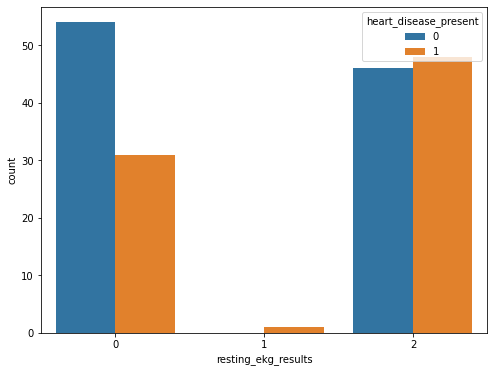

In [32]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='resting_ekg_results', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl', ylabel='count'>

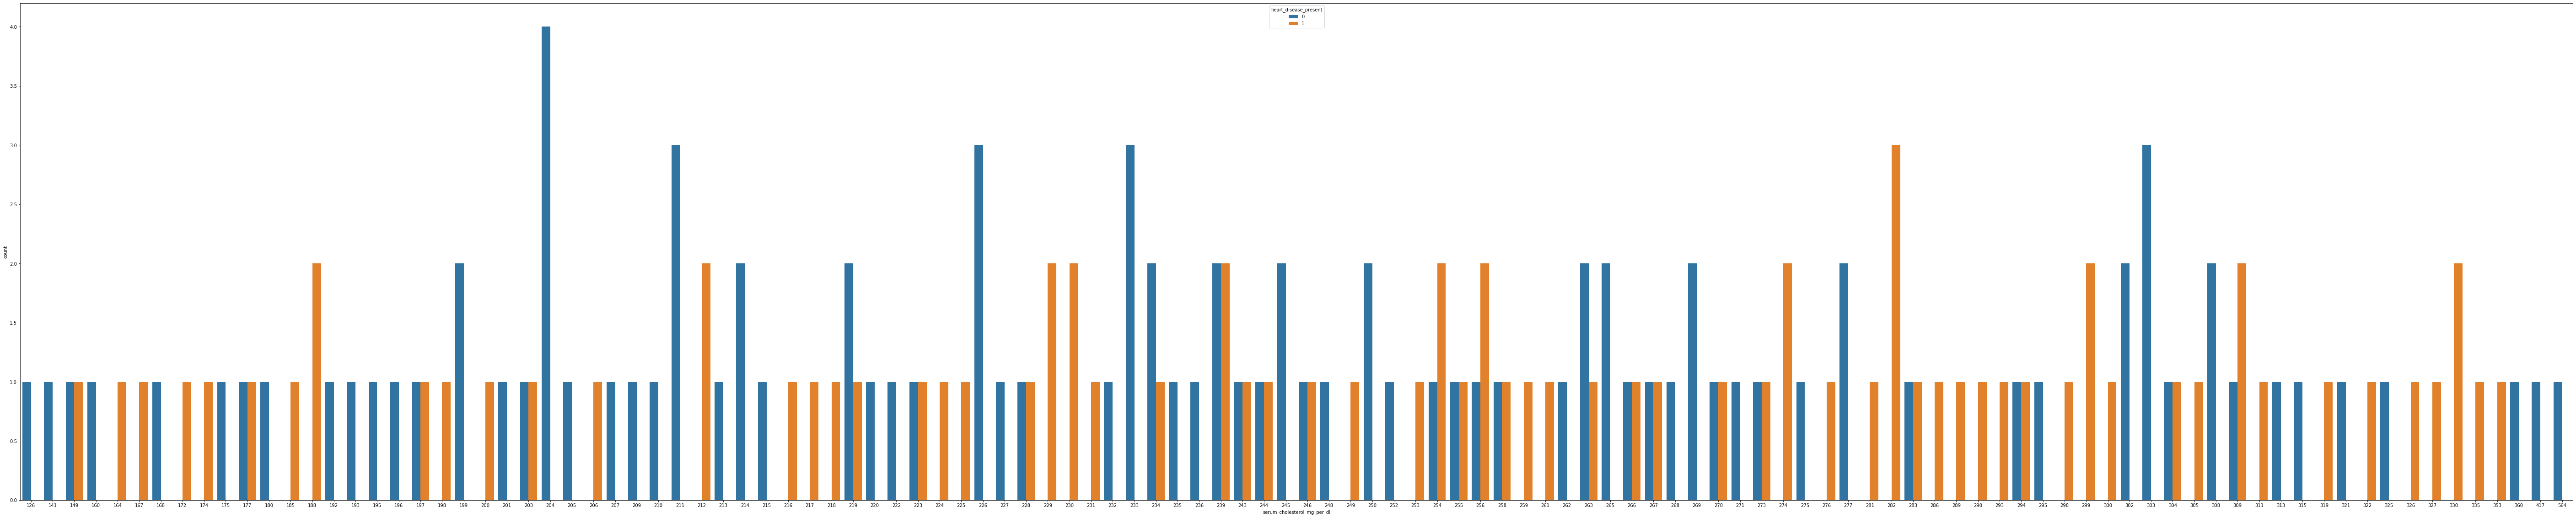

In [33]:
fig, ax = plt.subplots( figsize = (100,20) )
sns.countplot( x='serum_cholesterol_mg_per_dl', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='oldpeak_eq_st_depression', ylabel='count'>

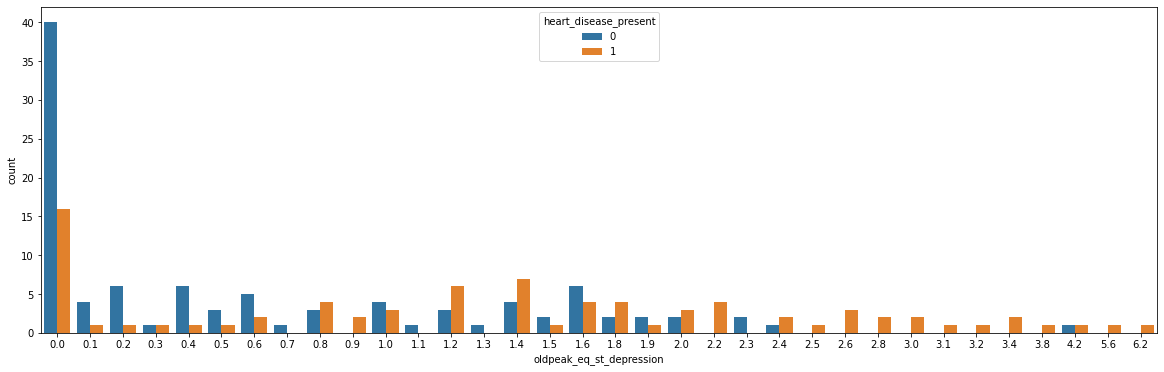

In [34]:
fig, ax = plt.subplots( figsize = (20,6) )
sns.countplot( x='oldpeak_eq_st_depression', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='sex', ylabel='count'>

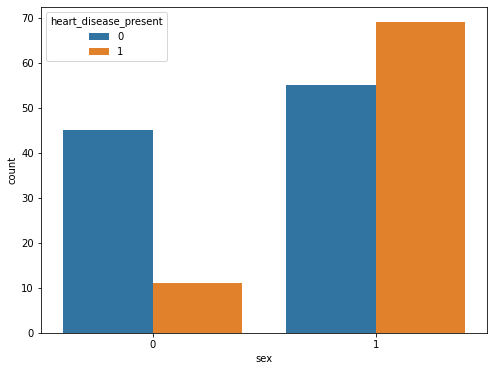

In [35]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='sex', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='age', ylabel='count'>

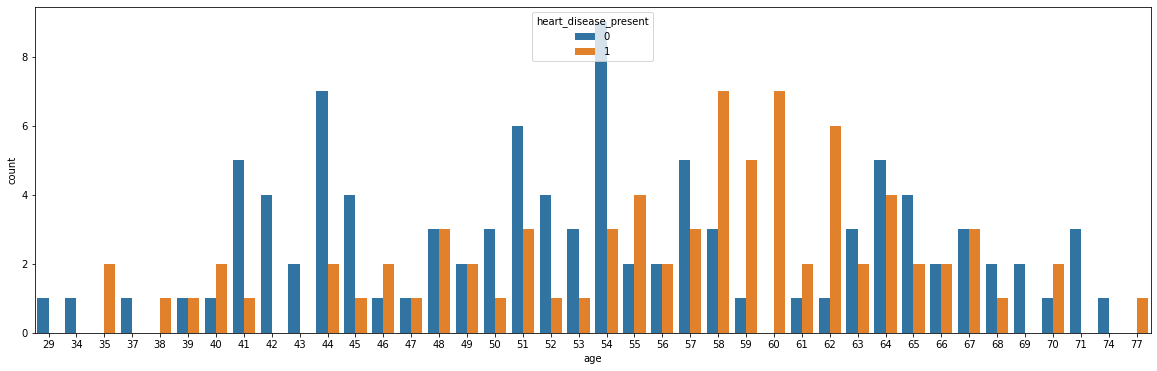

In [36]:
fig, ax = plt.subplots( figsize = (20,6) )
sns.countplot( x='age', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='count'>

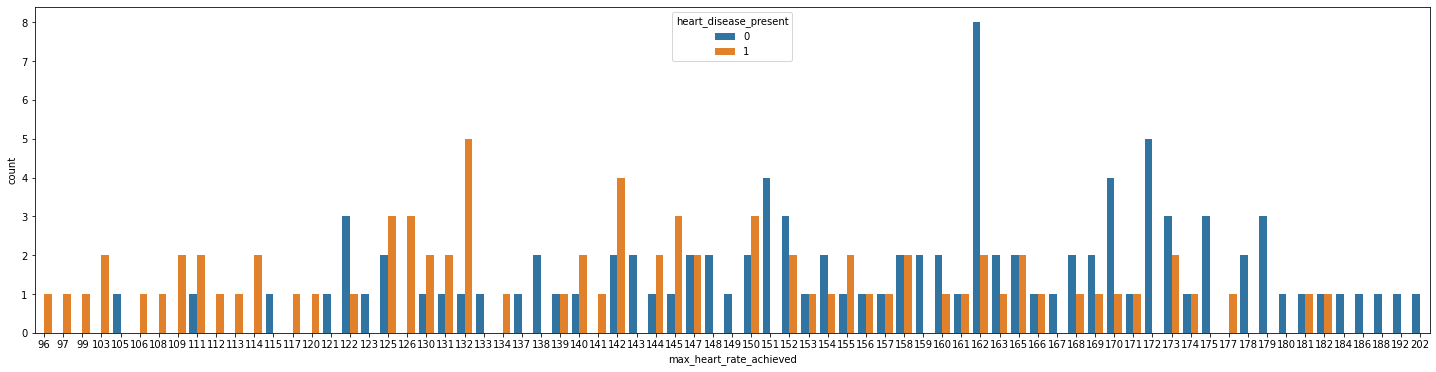

In [37]:
fig, ax = plt.subplots( figsize = (25,6) )
sns.countplot( x='max_heart_rate_achieved', hue='heart_disease_present', data=df )

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

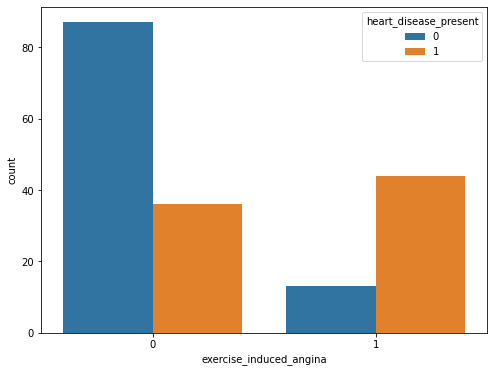

In [38]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='exercise_induced_angina', hue='heart_disease_present', data=df )

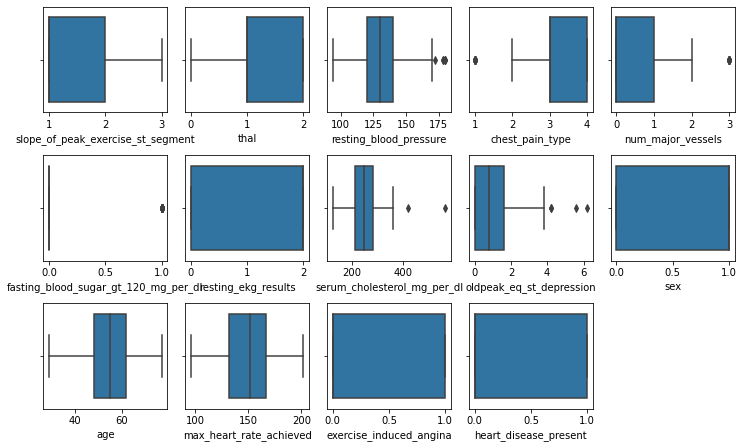

In [39]:
cols = 5
rows = 5
num_cols = df.select_dtypes(exclude = 'object').columns
fig = plt.figure(figsize = (cols*2, rows*2))
for i,col in enumerate(num_cols):
    ax = fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x=df[col],ax=ax)
fig.tight_layout()
plt.show()

<AxesSubplot:>

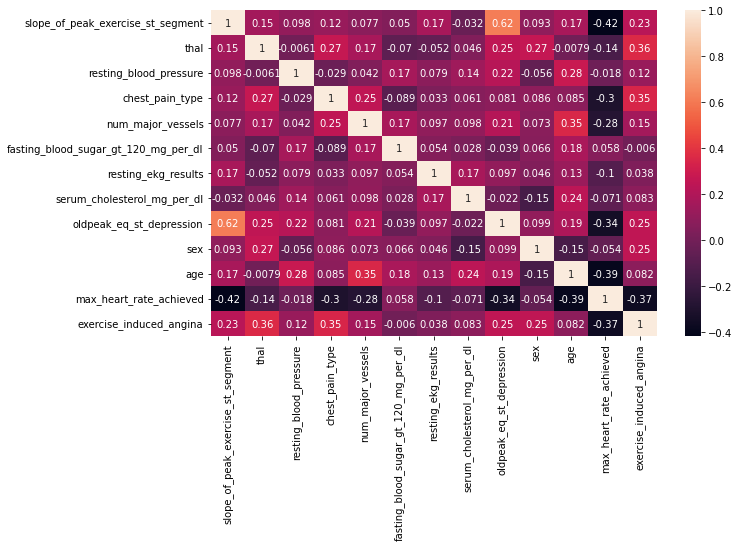

In [40]:
#checking for correlation
ax = plt.subplots( figsize = (10,6) )
sns.heatmap(df.drop(['heart_disease_present'],axis=1).corr(),annot=True)

oldpeak_eq_st_depression have correlated with slope of peak_exercise_st_segment

# Creating a Model

In [41]:
## Defining X and y and creating dependent and independent variables
X = df.drop(['heart_disease_present','oldpeak_eq_st_depression'], axis=1) ## independent variable
y = df['heart_disease_present'] ## Dependent or target variable or the variable which we have to predict

# Logistic Regression Model

In [42]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)# scaling independent variables

In [43]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 42)
#splitting data into train and test

In [44]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
    
log_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
# Prediction
y_train_lr=log_reg.predict(x_train)# predicting y_train 
y_test_lr= log_reg.predict(x_test) # predicting y_test

# Evolution of Logistic Regression Model

In [46]:
## calculating accuracy train data
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy_train_lr = accuracy_score(y_train,y_train_lr)# model traning accuracy  
accuracy_train_lr

0.8296296296296296

In [47]:
## calculating accuracy test data
accuracy_test_lr=accuracy_score(y_test,y_test_lr)
accuracy_test_lr

0.8444444444444444

In [48]:
# F1 Score test
F1_Score = f1_score(y_test,y_test_lr)# when precision and recall both are important
F1_Score

0.8444444444444443

In [49]:
# Classification report test data
report_lr=classification_report(y_test, y_test_lr)# it will give precision,recall,f1 scores and accuracy  
print(report_lr)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.73      0.84        26

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.89      0.84      0.84        45



In [50]:
#Confusion matrix logistic regression
print(confusion_matrix(y_test,y_test_lr))

[[19  0]
 [ 7 19]]


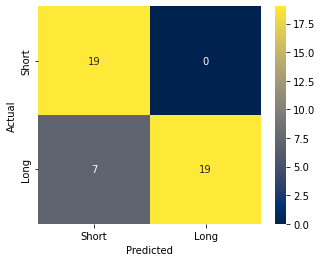

In [52]:
a = confusion_matrix(y_test,y_test_lr)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='cividis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameters Of Logistic Regression

In [53]:
from sklearn.model_selection import GridSearchCV

params_lr = {
    "penalty":('l1', 'l2', 'elasticnet', 'none'),
    "solver": ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
    "C": (np.logspace(-4,1,4,20))
}

In [54]:
# GridSearch
log_reg_2 =LogisticRegression()
log_reg_cv = GridSearchCV(log_reg_2 , params_lr, scoring="f1", n_jobs=-1, verbose=1, cv=3)

log_reg_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params_lr = log_reg_cv.best_params_#it will give you best parameters 
print(f"Best paramters_log_reg: {best_params_lr})")#printing  best parameters


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best paramters_log_reg: {'C': 0.21544346900318845, 'penalty': 'l1', 'solver': 'liblinear'})


In [55]:
##Model creation
log_reg_2 = LogisticRegression(C= 0.21544346900318845, penalty='l1', solver='liblinear')
log_reg_2.fit(x_train,y_train)
y_test_lr2= log_reg_2.predict(x_test) # predicting y_test

# F1 Score test
F1_Score_lr2 = f1_score(y_test,y_test_lr2)# when precision and recall both are important
F1_Score_lr2

0.8444444444444443

In [56]:
#Confusion matrix logistic regression
print(confusion_matrix(y_test,y_test_lr2))

[[19  0]
 [ 7 19]]


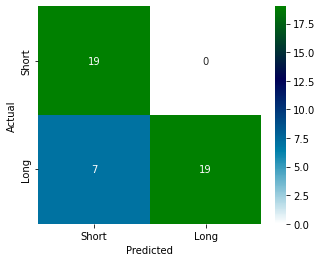

In [57]:
a = confusion_matrix(y_test,y_test_lr2)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='ocean_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

In [58]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size= 0.25,random_state = 42)


In [59]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,Y_train)#training the data

RandomForestClassifier()

In [60]:
#Prediction
y_train_rf=rf_clf.predict(X_train)#testing
y_test_rf=rf_clf.predict(X_test)#testing

# Evolution Of Random Forest

In [61]:
## calculating accuracy train data
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy_train_rf = accuracy_score(y_train,y_train_rf)# model traning accuracy  
accuracy_train_rf

1.0

In [62]:
## calculating accuracy test data
accuracy_test_rf=accuracy_score(y_test,y_test_rf)
accuracy_test_rf

0.8444444444444444

In [63]:
f_Score_rf=f1_score(y_test,y_test_rf)
f_Score_rf

0.8510638297872339

In [64]:
# Classification report test data
report_rf=classification_report(y_test, y_test_rf)# it will give precision,recall,f1 scores and accuracy  
print(report_rf)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [65]:
print(confusion_matrix(y_test,y_test_rf))

[[18  1]
 [ 6 20]]


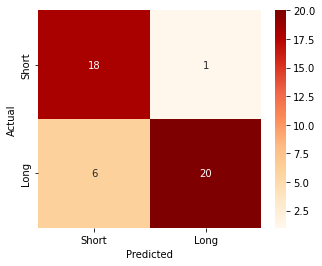

In [67]:
a = confusion_matrix(y_test,y_test_rf)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='OrRd', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning

In [68]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, Y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False})


In [69]:
rf_clf2 = RandomForestClassifier(n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', 
                                 max_depth= 20, bootstrap=False)

rf_clf2.fit(X_train, Y_train)#t
y_test_rf2=rf_clf2.predict(X_test)#testing
f1_score_rf2=f1_score(Y_test,y_test_rf2)#checking performance
f1_score_rf2

0.8260869565217392

In [70]:
print(confusion_matrix(y_test,y_test_rf2))

[[18  1]
 [ 7 19]]


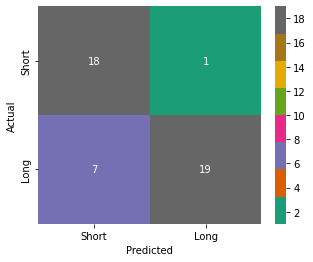

In [71]:
a = confusion_matrix(y_test,y_test_rf2)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='Dark2', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost

In [72]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size= 0.25,random_state = 42)

In [73]:
## model creation XGBOOSTING
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(X_train,Y_train)# fitting the data
y_train_xgb=xgb.predict(X_train)
y_test_xgb=xgb.predict(X_test)

# Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

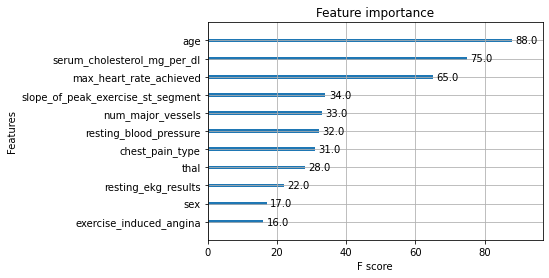

In [74]:
from xgboost import plot_importance
plot_importance(xgb)

# Evolution Of XGBoost

In [75]:
## Accuracy data Train
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix# to check model performance
accuracy_train_xgb=accuracy_score(Y_train,y_train_xgb)
accuracy_train_xgb

1.0

In [76]:
#accuracy test
accuracy_test_xgb=accuracy_score(Y_test,y_test_xgb)
accuracy_test_xgb

0.8444444444444444

In [77]:
# Classification report test data
report_xgb=classification_report(Y_test, y_test_xgb)# it will give precision,recall,f1 scores and accuracy  
print(report_xgb)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.77      0.85        26

    accuracy                           0.84        45
   macro avg       0.85      0.86      0.84        45
weighted avg       0.87      0.84      0.85        45



In [78]:
f_Score_xgb=f1_score(Y_test,y_test_xgb)
f_Score_xgb

0.8510638297872339

In [79]:
print(confusion_matrix(Y_test,y_test_xgb))

[[18  1]
 [ 6 20]]


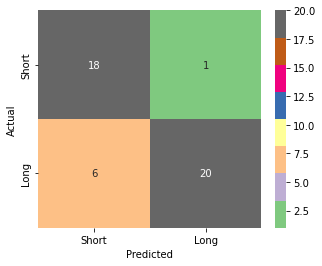

In [81]:
a = confusion_matrix(y_test,y_test_xgb)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='Accent', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning XGBoost

In [82]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
XGB_cv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
                        
XGB_cv.fit(X_train, Y_train)##training data on randomsearch cv


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6,
                                                  3.2, 6.4, 

In [83]:
XGB_cv.best_params_

{'reg_lambda': 3.2,
 'reg_alpha': 0,
 'n_estimators': 65,
 'max_depth': 5,
 'learning_rate': 0.6,
 'gamma': 0.8}

In [84]:
XGB2=XGBClassifier(reg_lambda= 3.2, reg_alpha= 0, n_estimators=65, max_depth=5, learning_rate=0.6, gamma=0.8)
XGB2.fit(X_train, Y_train)#training 
y_test_xgb2=XGB2.predict(X_test)#testing
f1_score_xgb2=f1_score(Y_test,y_test_xgb2)#checking performance
f1_score_xgb2

0.8979591836734695

In [85]:
print(classification_report(Y_test,y_test_xgb2))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.96      0.85      0.90        26

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



In [86]:
print(confusion_matrix(Y_test,y_test_xgb2))

[[18  1]
 [ 4 22]]


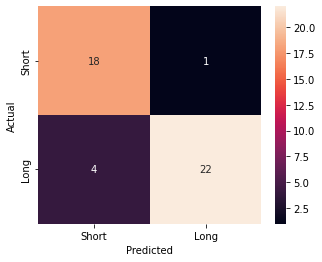

In [87]:
a = confusion_matrix(y_test,y_test_xgb2)
d = pd.DataFrame(a,index = ['Short','Long'],columns=['Short','Long'])
plt.figure(figsize=(5,4))
sns.heatmap(d, annot = True, cmap='rocket', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()